In [315]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [316]:
df = pd.read_csv("AirQualityUCI.csv",delimiter=";")

In [317]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [318]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


# Data Cleaning

In [319]:
df =df.drop(["Unnamed: 15","Unnamed: 16"],axis=1)

In [320]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [321]:
df.shape

(9471, 15)

In [322]:
df =df.dropna(axis=0)

In [323]:
df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [324]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
5937,13/11/2004,03.00.00,"0,8",891.0,-200.0,"2,7",633.0,-200.0,1035.0,-200.0,1137.0,590.0,"15,7","60,1","1,0640"
5096,09/10/2004,02.00.00,"1,4",1150.0,-200.0,"7,3",871.0,155.0,697.0,58.0,1502.0,1030.0,"21,1","64,5","1,5940"
8411,24/02/2005,05.00.00,"0,6",883.0,-200.0,"1,2",518.0,87.0,1135.0,81.0,962.0,606.0,"3,3","84,5","0,6612"
6273,27/11/2004,03.00.00,"2,7",1279.0,-200.0,"10,2",986.0,-200.0,756.0,-200.0,1362.0,1473.0,"11,9","79,7","1,1075"
6407,02/12/2004,17.00.00,"4,9",1516.0,-200.0,"24,8",1423.0,774.0,455.0,151.0,1881.0,1688.0,"16,7","67,3","1,2707"


In [325]:
df['CO(GT)'] = df['CO(GT)'].str.replace(",",'.')
df["T"] = df["T"].str.replace(",",'.')
df["RH"] = df["RH"].str.replace(",",'.')
df["AH"] = df["AH"].str.replace(",",'.')
df["C6H6(GT)"] = df["C6H6(GT)"].str.replace(",",'.')

In [326]:
# changing object data type -> datetime64[ns] type
df["Date"]=pd.to_datetime(df["Date"],format="%d/%m/%Y")

In [327]:
# changing H.M.S. -> H:M:S
df["Time"] = pd.to_datetime(df["Time"],format ="%H.%M.%S").dt.time

In [328]:
# replacing bad sensor readings designated by an entry of -200 with NaN
df.replace(-200,np.NaN,inplace=True)

In [329]:
#checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   object        
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       9357 non-null   object        
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              9357 non-null   object        
 13  RH             9357 non-null   object        
 14  AH             9357 non-null   object        
dtypes: datetime64[ns](1), floa

In [330]:
# change column datatype to it's appropriate data type
df[["CO(GT)",'C6H6(GT)',"T","RH","AH"]] = df[["CO(GT)",'C6H6(GT)',"T","RH","AH"]].astype('float64')

In [331]:
# checking again after changing data
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [332]:
# determining the null value percentage in each column
(df.isnull().sum()/len(df))*100

Date              0.000000
Time              0.000000
CO(GT)            0.000000
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          0.000000
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [333]:
# As more than 90% of the data is null so it's better to remove the column
df.drop(["NMHC(GT)"],axis=1, inplace=True)

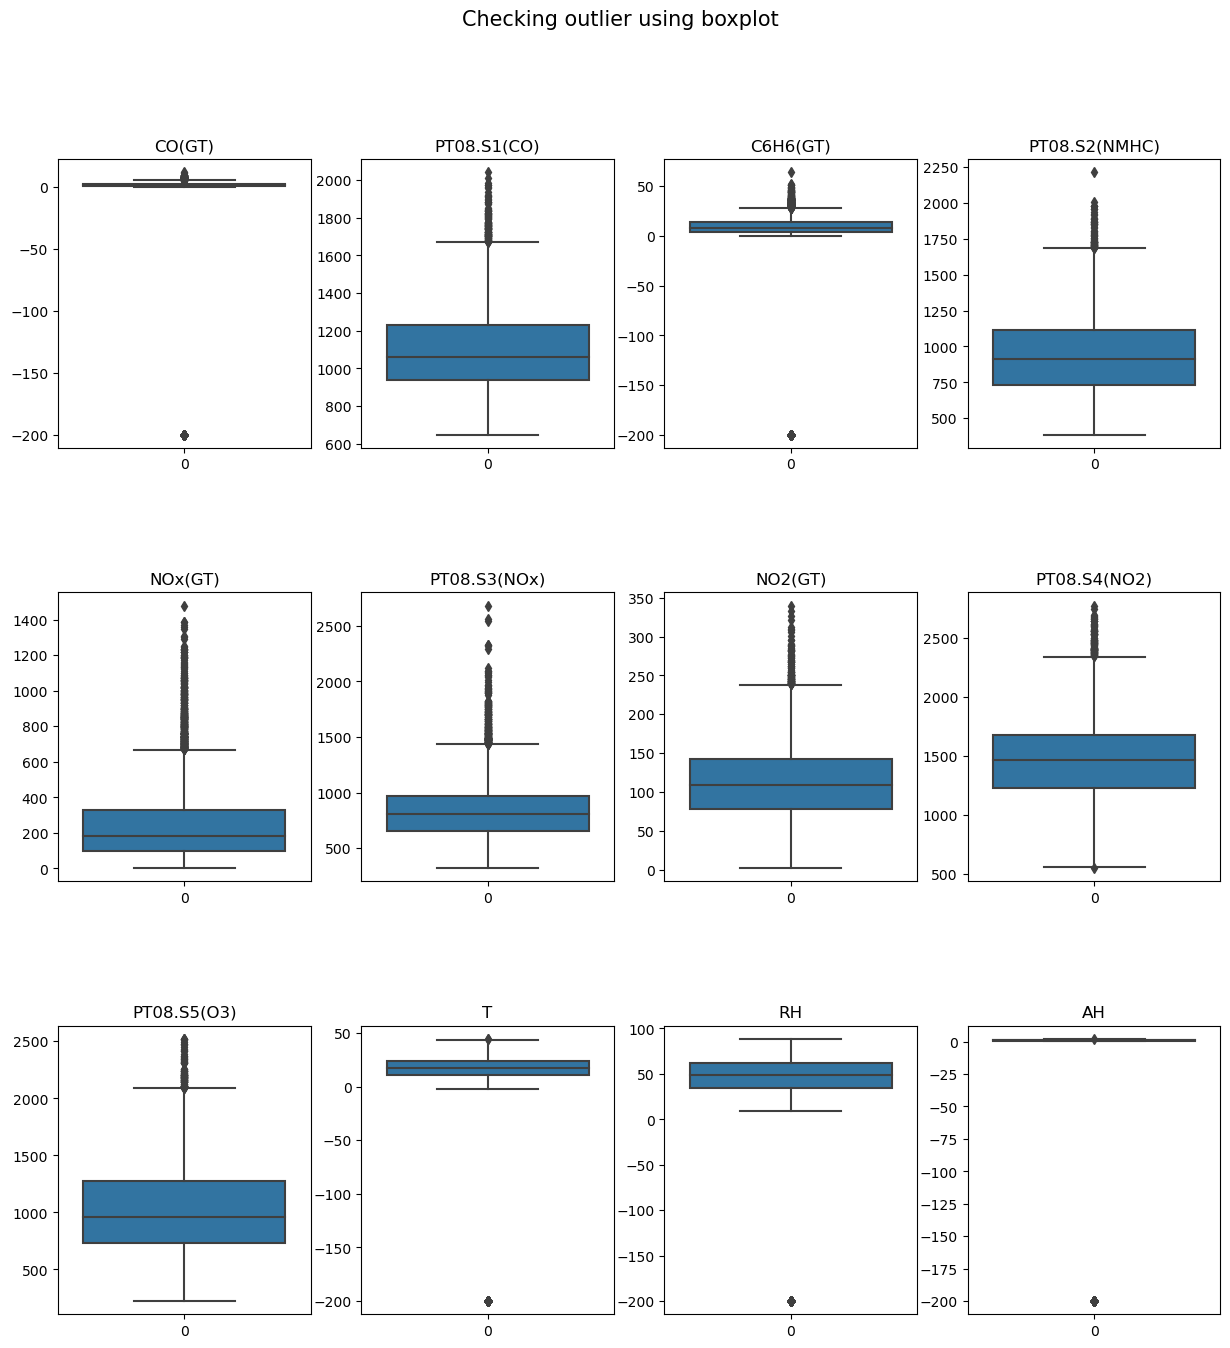

In [334]:
column = list(df.columns)[2:]

plt.figure(figsize = (15,15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Checking outlier using boxplot",fontsize=15)
for c,col in enumerate(column):
    axes = plt.subplot(3,4,c+1)
    sns.boxplot(df[col])
    plt.title(col)

In [335]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [336]:
Q1 = df.iloc[:,2:].quantile(0.25)
Q3 = df.iloc[:,2:].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.4*IQR
upper = Q3 + 1.4*IQR

condition = ~((df[column] < lower) | (df[column] > upper)).any(axis=1)

df_filter = df[condition]

In [337]:
print("Total rows removed:",len(df) - len(df_filter))

Total rows removed: 2869


In [338]:
#Pandas profiling
# Ordinary least square
# linear regression model
# pickle

In [339]:
df_filter.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [340]:
import sys
sys.version

'3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]'

<Axes: >

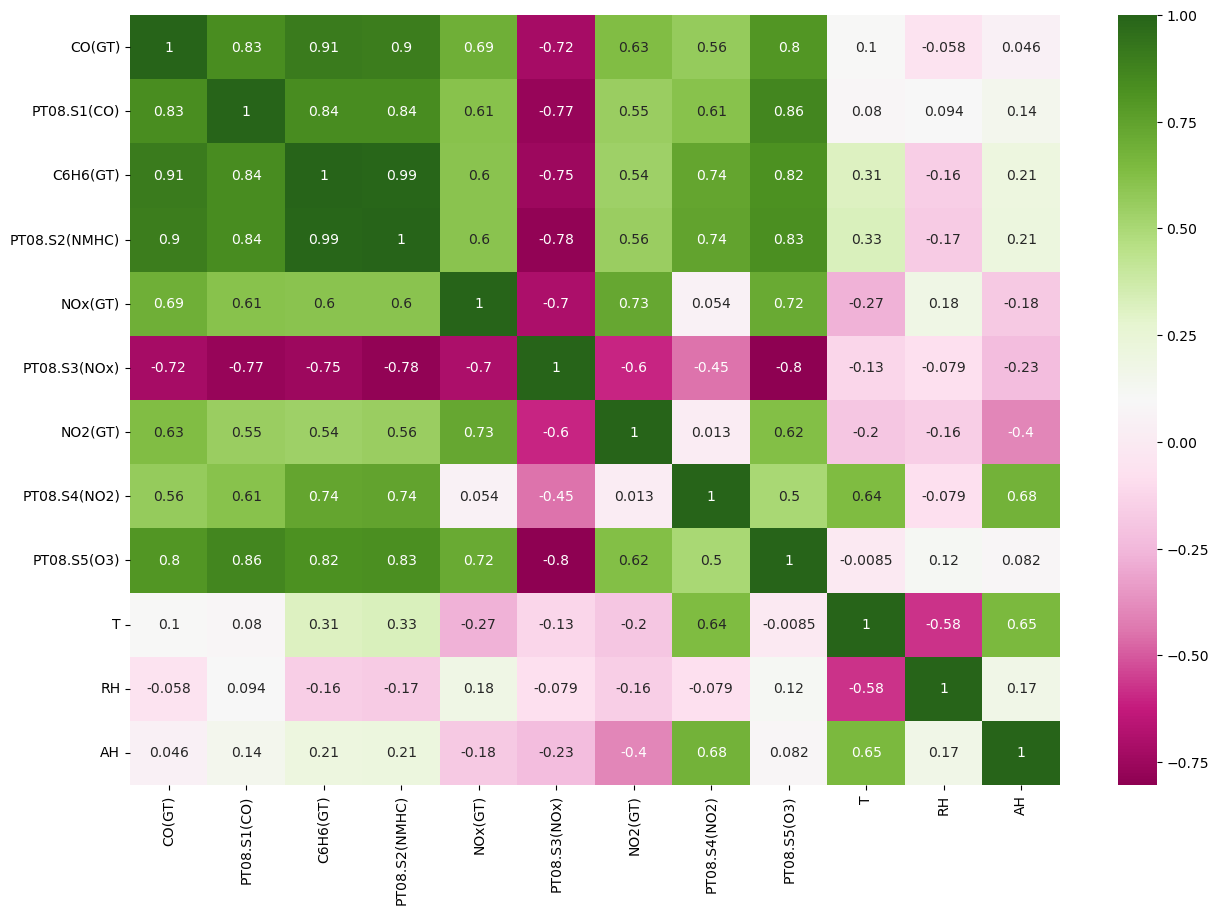

In [341]:
# check the  correlation coeffient  to see which variables are highly correlated
plt.figure(figsize=(15,10))
sns.heatmap(df_filter.iloc[:,2:].corr(),annot=True,cmap="PiYG")

# Building a linear model

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [343]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [344]:
df_filter.drop(["Date",'Time'],axis=1,inplace=True)
scale = MinMaxScaler()
col = list(df_filter.columns)
df_filter.loc[:, col] = scale.fit_transform(df_filter[col])

In [345]:
df_filter.dropna(subset=['NOx(GT)','NO2(GT)'],inplace=True)

In [346]:
X = df_filter.drop(['CO(GT)'], axis=1)
y = df_filter['CO(GT)']

In [347]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [348]:
model = Ridge(alpha=9)

In [349]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [350]:
from sklearn.metrics import r2_score

In [351]:
r2_score(y_test, y_pred)

0.8759929408843411

In [352]:
import pickle

In [353]:
pickle.dump(model,open("reg.sav","wb"))

In [354]:
X_train.shape

(4590, 11)

# Residual analysis of Train data

In [355]:
y_train_pred = model.predict(X_train)

Text(0.5, 0, 'Error')

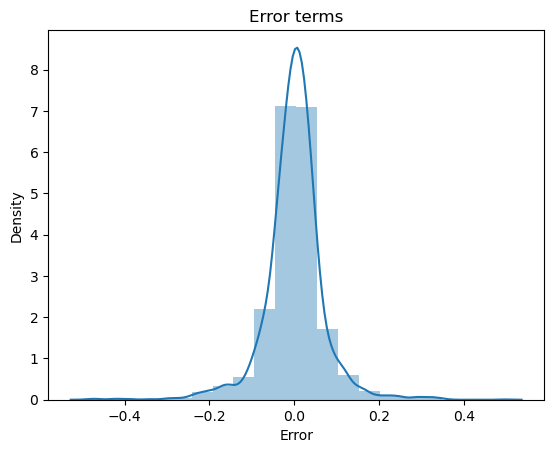

In [356]:
sns.distplot((y_train - y_train_pred),bins=20)
plt.title("Error terms")
plt.xlabel("Error")

# Model Evalutation

Text(0, 0.5, 'y_pred')

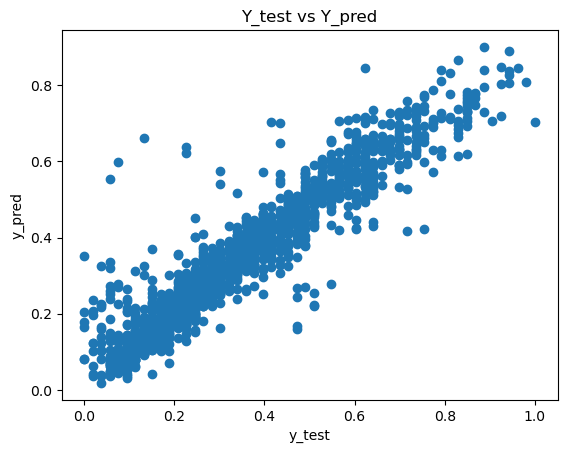

In [357]:
plt.scatter(y_test,y_pred)
plt.title("Y_test vs Y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [358]:
model.coef_

array([ 0.16943917,  0.34542242,  0.23616386,  0.16769698,  0.061184  ,
        0.10513803,  0.12383077, -0.04271311, -0.10709512, -0.01914042,
       -0.02177451])

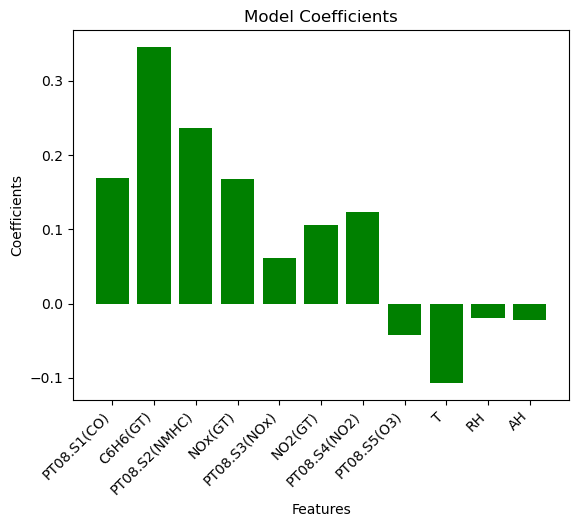

In [359]:
import matplotlib.pyplot as plt
import numpy as np



col =list( X_train.columns)
plt.bar(col, model.coef_, color='green')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Model Coefficients')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
